In [113]:
import pandas as pd
import numpy as np

In [114]:
df = pd.read_csv('diabetes.csv')

df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [116]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [117]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Features :

1. Pregnancies : Number of pregnancies of the woman.

2. Glucose : Amount of glucose present in the blood.

3. BloodPressure : Blood Pressure of the woman.

4. SkinThickness : Skin Thickness of the woman.

5. Insulin : The amount of Insulin intake.

6. BMI : Body Mass Index value of the woman.

7. DiabetesPedigreeFunction : The value of the Diabetes Pedigree Function

8. Age : The age of the woman.

9. Outcome : Target column whether the woman has diabetes or not.

<Axes: ylabel='count'>

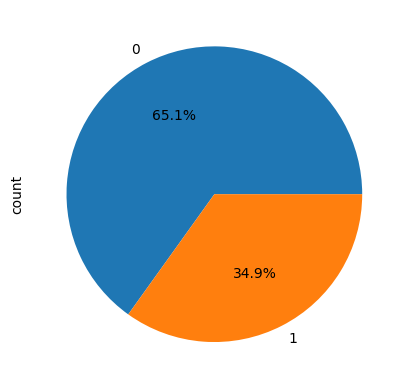

In [118]:
import matplotlib.pyplot as plt

df['Outcome'].value_counts().plot(kind='pie', autopct = '%.1f%%')

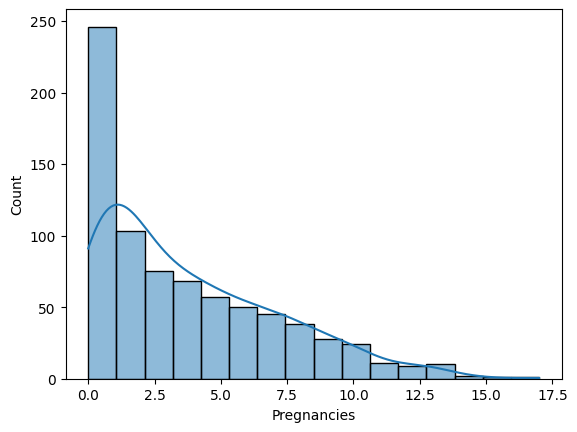

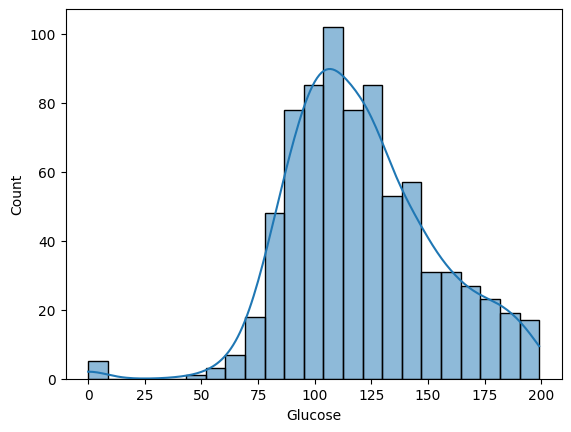

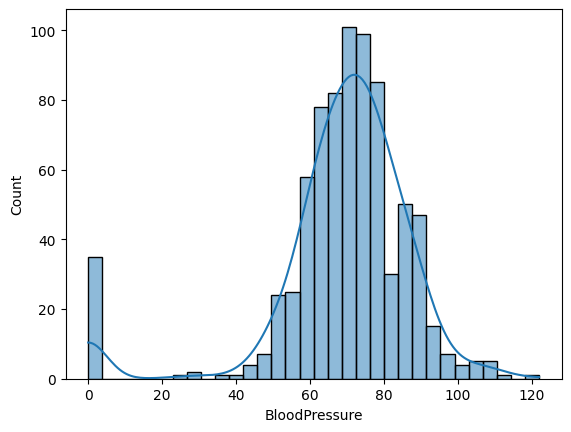

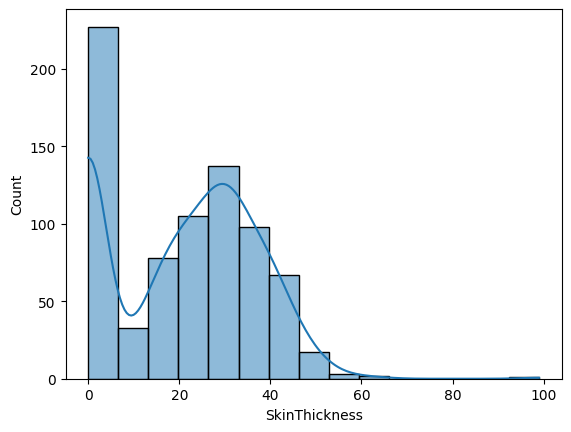

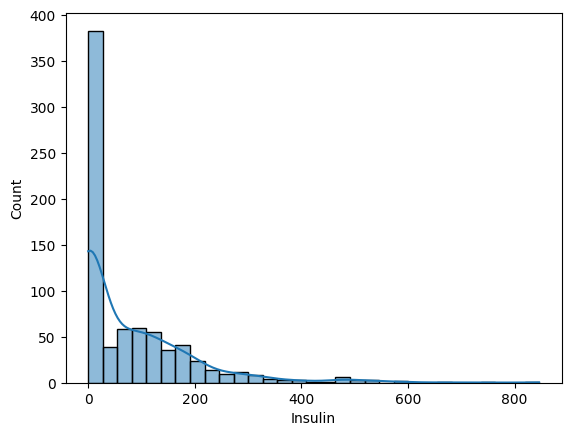

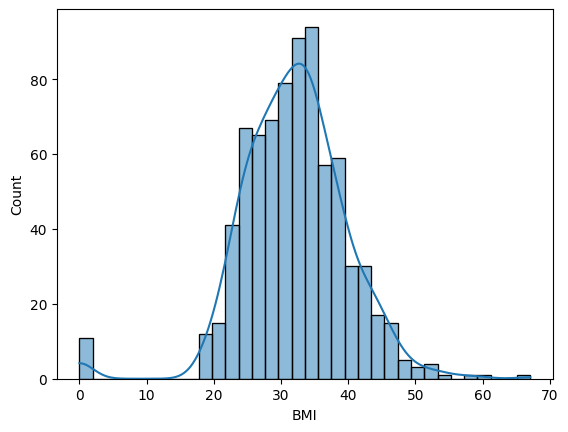

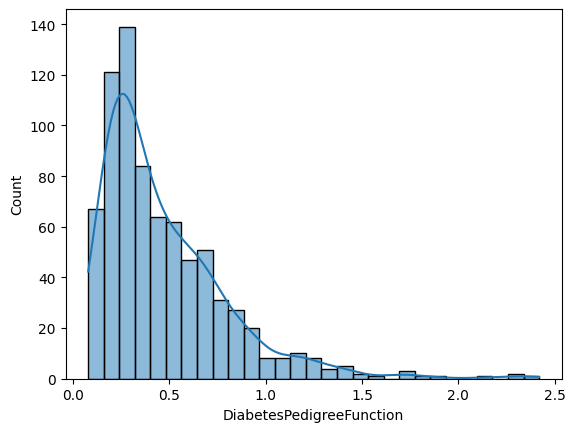

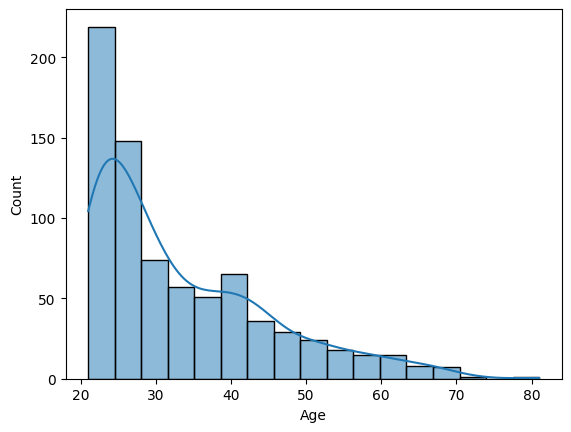

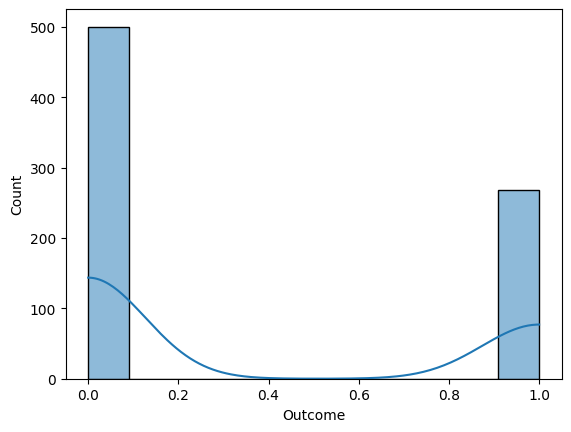

In [86]:
import seaborn as sns

for col in df.columns:
    if df[col].dtype == 'object':
        counts = df[col].value_counts()
        plt.pie(counts, labels=counts.index, autopct='%.1f%%')
        plt.title(f"{col} distribution")
    else:
        sns.histplot(data=df, x=col, kde=True)

    plt.subplots_adjust(hspace=0.5)
    plt.show()

In [119]:
df.duplicated().sum()

np.int64(0)

In [120]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
y_train.value_counts()

Outcome
0    401
1    213
Name: count, dtype: int64

In [124]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [125]:
X_train_resampled.shape

(802, 8)

In [126]:
y_train_resampled.value_counts()

Outcome
0    401
1    401
Name: count, dtype: int64

In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

num_neighbours = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27]
accuracies = []

for n in num_neighbours:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_resampled, y_train_resampled)
    knn_pred = knn.predict(X_test)
    accuracy_knn = accuracy_score(y_test, knn_pred)
    accuracies.append(accuracy_knn)
    print("KNN Accuracy for neigbours = ", n, " is : ", round(accuracy_knn, 4))

KNN Accuracy for neigbours =  1  is :  0.6429
KNN Accuracy for neigbours =  3  is :  0.6558
KNN Accuracy for neigbours =  5  is :  0.6364
KNN Accuracy for neigbours =  7  is :  0.6688
KNN Accuracy for neigbours =  9  is :  0.6558
KNN Accuracy for neigbours =  11  is :  0.6753
KNN Accuracy for neigbours =  13  is :  0.6688
KNN Accuracy for neigbours =  15  is :  0.6753
KNN Accuracy for neigbours =  17  is :  0.7078
KNN Accuracy for neigbours =  19  is :  0.6688
KNN Accuracy for neigbours =  21  is :  0.6558
KNN Accuracy for neigbours =  23  is :  0.6494
KNN Accuracy for neigbours =  25  is :  0.6364
KNN Accuracy for neigbours =  27  is :  0.6494


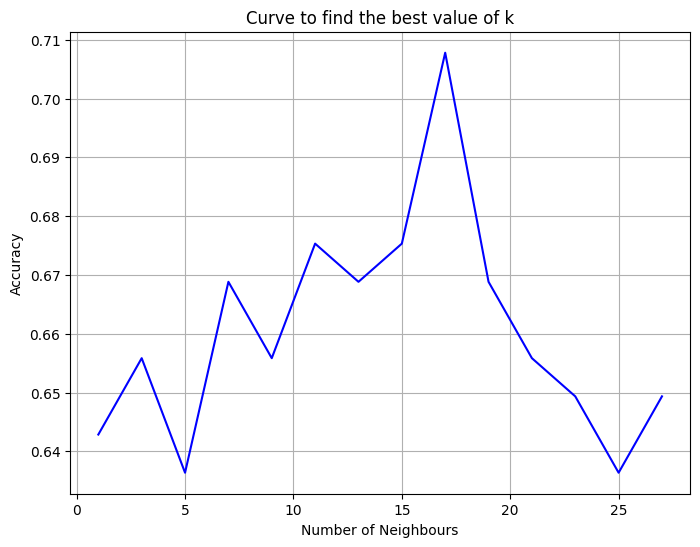

In [128]:
plt.figure(figsize=(8, 6))
plt.plot(num_neighbours, accuracies, color='b')
plt.title('Curve to find the best value of k')
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [129]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_grid_search.fit(X_train_resampled, y_train_resampled)
print(knn_grid_search.best_params_)
print(knn_grid_search.best_score_)

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
0.801777950310559


In [130]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_resampled, y_train_resampled)

log_pred = log_reg.predict(X_test)
print(f"Accuracy of Logistic Regression :  {round(accuracy_score(y_test, log_pred), 4)}")

Accuracy of Logistic Regression :  0.7078


C:\Users\Admin-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [131]:
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300],  
    'penalty': ['l2'],  
}

log_reg_grid_search = GridSearchCV(log_reg, param_grid, cv=5, n_jobs=-1, verbose=1)

log_reg_grid_search.fit(X_train_resampled, y_train_resampled)

print(f"Best parameters: {log_reg_grid_search.best_params_}")

log_pred = log_reg_grid_search.best_estimator_.predict(X_test)

accuracy = accuracy_score(y_test, log_pred)
print(f"Accuracy of Logistic Regression with GridSearchCV: {round(accuracy, 4)}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy of Logistic Regression with GridSearchCV: 0.6948


C:\Users\Admin-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


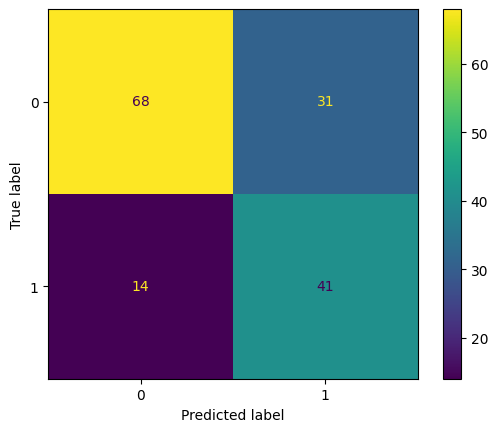

In [132]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test)

In [133]:
from sklearn.ensemble import AdaBoostClassifier

ada_bst = AdaBoostClassifier()
ada_bst.fit(X_train_resampled, y_train_resampled)
ada_pred = ada_bst.predict(X_test)

print(f"Adaboost Accuracy :  {round(accuracy_score(y_test, ada_pred), 4)}")

Adaboost Accuracy :  0.7403


In [134]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],   
    'learning_rate': [0.01, 0.1, 0.5, 1.0] 
}

ada_bst_grid_search = GridSearchCV(estimator=ada_bst, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)


ada_bst_grid_search.fit(X_train_resampled, y_train_resampled)

best_params = ada_bst_grid_search.best_params_
best_model = ada_bst_grid_search.best_estimator_

ada_pred = best_model.predict(X_test)

print(f"Best AdaBoost Model Accuracy: {round(accuracy_score(y_test, ada_pred), 4)}")
print(f"Best Hyperparameters: {best_params}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best AdaBoost Model Accuracy: 0.7403
Best Hyperparameters: {'learning_rate': 1.0, 'n_estimators': 150}


In [135]:
from sklearn.metrics import classification_report

print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.86      0.72      0.78        99
           1       0.61      0.78      0.68        55

    accuracy                           0.74       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.77      0.74      0.75       154



In [136]:
from sklearn.ensemble import RandomForestClassifier
rand_frst = RandomForestClassifier(n_estimators = 100, random_state=9)

rand_frst.fit(X_train, y_train)

rand_pred = rand_frst.predict(X_test)
print(f"Random Forest Accuracy : {round(accuracy_score(y_test, rand_pred), 4)}")

Random Forest Accuracy : 0.7338


In [104]:
n_estimators = [20, 60, 100, 120]

max_features = [0.2, 0.6, 1.0, 'sqrt']

max_depth = [2, 8, None]

max_samples = [0.5, 0.75, 1.0]

param_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'max_samples' : max_samples
}

rand_frst_grid_search = GridSearchCV(estimator=rand_frst, 
                       param_grid=param_grid, 
                       cv=5,
                       verbose=2, 
                       n_jobs=-1)

rand_frst_grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=9), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0, 'sqrt'],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [105]:
rand_frst_grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'max_samples': 1.0,
 'n_estimators': 60}

In [106]:
rand_frst_grid_search.best_score_

np.float64(0.8354813664596273)

In [107]:
X_test.shape, y_test.shape

((154, 8), (154,))

In [139]:
X_test.iloc[28], y_test.iloc[28]

(Pregnancies                   2.000
 Glucose                     102.000
 BloodPressure                86.000
 SkinThickness                36.000
 Insulin                     120.000
 BMI                          45.500
 DiabetesPedigreeFunction      0.127
 Age                          23.000
 Name: 328, dtype: float64,
 np.int64(1))

In [109]:
import pickle
pickle.dump(knn_grid_search.best_estimator_, open('knn_grid_search.pkl', 'wb'))

from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_resampled),
    feature_names=X_train_resampled.columns,
    mode='classification'
)

exp = interpretor.explain_instance(
    data_row=X_test.iloc[113],
    predict_fn=knn_grid_search.predict_proba
)

exp.show_in_notebook(show_table = True)

C:\Users\Admin-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Admin-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Admin-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

In [110]:
pickle.dump(log_reg_grid_search.best_estimator_, open('log_reg_grid_search.pkl', 'wb'))

interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_resampled),
    feature_names=X_train_resampled.columns,
    mode='classification'
)

exp = interpretor.explain_instance(
    data_row=X_test.iloc[113],
    predict_fn=knn_grid_search.predict_proba
)

exp.show_in_notebook(show_table = True)

C:\Users\Admin-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Admin-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Admin-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

In [111]:
pickle.dump(ada_bst_grid_search.best_estimator_, open('ada_bst_grid_search.pkl', 'wb'))

interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_resampled),
    feature_names=X_train_resampled.columns,
    mode='classification'
)

exp = interpretor.explain_instance(
    data_row=X_test.iloc[113],
    predict_fn=knn_grid_search.predict_proba
)

exp.show_in_notebook(show_table = True)

C:\Users\Admin-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Admin-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Admin-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

In [112]:
pickle.dump(rand_frst_grid_search.best_estimator_, open('rand_frst_grid_search.pkl', 'wb'))

interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_resampled),
    feature_names=X_train_resampled.columns,
    mode='classification'
)

exp = interpretor.explain_instance(
    data_row=X_test.iloc[113],
    predict_fn=knn_grid_search.predict_proba
)

exp.show_in_notebook(show_table = True)

C:\Users\Admin-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Admin-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Admin-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8